In [0]:
import torch

In [0]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print("size: ",x.size()) 
print("shape: ",x.shape)
print("rank(차원) : ",x.ndimension())

size:  torch.Size([3, 3])
shape:  torch.Size([3, 3])
rank(차원) :  2


In [0]:
##차원 늘리기 
x= torch.unsqueeze(x,0)
print(x)
print("size",x.size())
print("shape",x.shape)
print("rank(차원)",x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
size torch.Size([1, 3, 3])
shape torch.Size([1, 3, 3])
rank(차원) 3


In [0]:
## rank 줄이기
x= torch.squeeze(x) ## rank중 크기가 1인 랭크를 삭제 
print(x)
print("shape :",x.shape)
print("rank : ",x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
shape : torch.Size([3, 3])
rank :  2


In [0]:
x = x.view(9)
print(x)
print("size",x.size())
print("shape",x.shape)
print("rank(차원)",x.ndimension())

## squeeze, unsqueeze,view -> 텐서의 원소수를 그대로 유지하면서 모양과 차원을 조절

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
size torch.Size([9])
shape torch.Size([9])
rank(차원) 1


In [0]:
try :
  x= x.view(2,9)
  print(x)
except Exception as e:
  print(e)

shape '[2, 9]' is invalid for input of size 9


In [0]:
## 행렬 

w = torch.randn(5,3,dtype=torch.float) ##정규분포에서 무작위로 뽑기 [5,3]
x = torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])

print("w size : ",w.size())
print("x size :" , x.size())
print("w", w)
print("x", x)

w size :  torch.Size([5, 3])
x size : torch.Size([3, 2])
w tensor([[-1.8750,  0.1238, -1.3625],
        [-0.1378, -0.0313,  0.5198],
        [-0.5325,  0.0151, -0.9855],
        [ 0.4304,  0.7579, -0.3053],
        [ 2.1282, -2.5498, -0.4311]])
x tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [0]:
b= torch.randn(5,2,dtype=torch.float)
print("b size", b.size())
print("b ",b)

b size torch.Size([5, 2])
b  tensor([[-2.0468,  0.1555],
        [ 0.4673, -1.6186],
        [-1.2483, -1.1508],
        [-1.2558,  0.6390],
        [-0.5176, -0.2301]])


In [0]:
wx = torch.mm(w,x)
print("ws size",wx.size())
print("ws ",wx)

result =wx+b
print("result size",result.size())
print("result :",result)

ws size torch.Size([5, 2])
ws  tensor([[ -8.3163, -11.4300],
        [  2.3673,   2.7180],
        [ -5.4149,  -6.9179],
        [  1.1775,   2.0605],
        [ -7.6765,  -8.5292]])
result size torch.Size([5, 2])
result : tensor([[-10.3631, -11.2745],
        [  2.8346,   1.0994],
        [ -6.6632,  -8.0687],
        [ -0.0783,   2.6995],
        [ -8.1941,  -8.7593]])


In [0]:
##autograd

w = torch.tensor(1.0,requires_grad=True) 
## require grade ==true -> autograde 기능이 자동으로 
## 계산할때 w에 대한 미분값을 w.grade에 저장}

print("w ",w)
a=w*3
l =a**2

l.backward()
print("l을 w로 미분한 값은 {}".format(w.grad))

w  tensor(1., requires_grad=True)
l을 w로 미분한 값은 18.0


In [0]:
"""
진짜 image -> weird_function() -> 오염된 이미지
random하게 만든 image -> weird_function() -> 랜덤 오염이미지
오염된 이미지 == 랜덤 오염이미지 -> 진짜 image == random하게만든 이미지
오염된 이미지와 랜덤 오염이미지 차이를 backpropagation해서 학습 
"""

In [2]:
import pickle
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


broken_imagesize  torch.Size([10000])


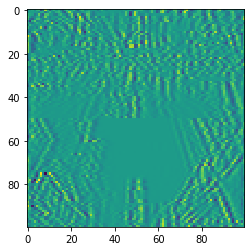

In [0]:
broken_image_url = "/content/gdrive/My Drive/Colab Notebooks/pytorch/broken_image_t.p" #FIXME
broken_image = torch.FloatTensor(pickle.load(open(broken_image_url,'rb'),encoding='latin1'))
print("broken_imagesize ",broken_image.shape)
plt.imshow(broken_image.view(100,100))

In [0]:
def weird_function(x, n_iter=5):
  h = x    
  filt = torch.tensor([-1./3, 1./3, -1./3])
  for i in range(n_iter):
      zero_tensor = torch.tensor([1.0*0])
      h_l = torch.cat( (zero_tensor, h[:-1]), 0)
      h_r = torch.cat((h[1:], zero_tensor), 0  )
      h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
      if i % 2 == 0:
          h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
  return h
def distance_loss(hypothesis, broken_image):

  return torch.dist(hypothesis, broken_image)

loss at 0 = 12.343842506408691
loss at 1000 = 1.11712646484375
loss at 2000 = 0.5373544096946716
loss at 3000 = 0.3758128583431244
loss at 4000 = 0.29722854495048523
loss at 5000 = 0.24860842525959015
loss at 6000 = 0.21376101672649384
loss at 7000 = 0.1861666589975357
loss at 8000 = 0.16280364990234375
loss at 9000 = 0.14211755990982056
loss at 10000 = 0.12323494255542755
loss at 11000 = 0.1056271567940712
loss at 12000 = 0.08895320445299149
loss at 13000 = 0.07298289984464645
loss at 14000 = 0.05755490064620972
loss at 15000 = 0.04255563020706177
loss at 16000 = 0.02790750376880169
loss at 17000 = 0.02115727588534355
loss at 18000 = 0.021165909245610237
loss at 19000 = 0.02116723172366619


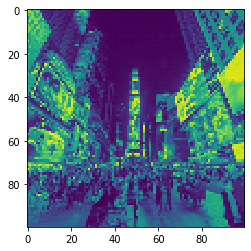

In [0]:
random_tensor = torch.randn(10000,dtype=torch.float)
lr = 0.8

for i in range(0,20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis,broken_image)
  loss.backward()
  with torch.no_grad(): ## 파이토치의 자동 기울기 계산을 비활성화 
    random_tensor = random_tensor - lr*random_tensor.grad
  ## random_tensor.grad -> loss.backword()에서 계산한 loss의 기울기==loss가 최댓점이 되는 곳의 방향
  if i %1000 ==0:
    print('loss at {} = {}'.format(i,loss.item()))

plt.imshow(random_tensor.view(100,100).data)


In [0]:
## clasification model 

import numpy
from sklearn.datasets import make_blobs ##예제용 데이터셋 만드어주는 함수 
import matplotlib.pyplot as plt
import torch.nn.functional as F 
import os

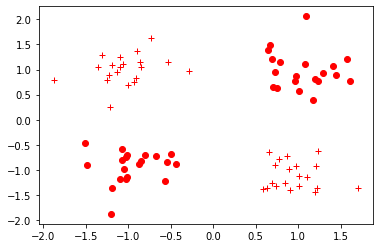

In [4]:

n_dim = 2
x_train, y_train = make_blobs(n_samples=80,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],shuffle=True,cluster_std=0.3) ##4개의 cluster => 0,1,2,3
#print(x_train.shape)
#print(x_train)
#print(y_train.shape)
#print(y_train)

##label 합치기 0,1 -> 0  //  2,3->1
def label_map(y_,from_,to_):
  y = numpy.copy(y_)
  for num in from_:
    y[y_==num] = to_
  return y

y_train = label_map(y_train,[0,1],0)
y_train = label_map(y_train,[2,3],1)
y_test = label_map(y_test,[0,1],0)
y_test = label_map(y_test,[2,3],1)


def vis_data(x,y = None,c='r'):
  if y is None:
    y = [None] * len(y)
    print(y)
  for x_, y_ in zip(x,y):
    if y_ is None:
      plt.plot(x_[0],x_[1],'*',markerfacecolor='none',markeredgecolor=c)
    else :
      plt.plot(x_[0],x_[1],c+'o' if y_ == 0 else c+'+')

plt.figure
vis_data(x_train,y_train,c='r')
plt.show()

In [0]:
## 데이터를 파이토치 tensor로 바꾸기 
#print(x_train)
x_train = torch.FloatTensor(x_train)
#print(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

class Neuralnet (torch.nn.Module):
  def __init__(self,input_size,hidden_size):
    super(Neuralnet,self).__init__()
    ##super() -> torch.nn.module class의 속성들을 가지고 초기화됨 
    self.input_size = input_size
    self.hidden_size = hidden_size

    ## 연산 정의 
    self.linear_1 = torch.nn.Linear(self.input_size,self.hidden_size) ## [input_Size, hidden_size] 크기의 w를 행렬곱하고 편향을 더하여 [1,hidden_size]로 return 시킴 
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(self.hidden_size,1)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self,input_tensor): ##__init__에서 정의된 동작들을 차례대로 실행 
 #   print("input_tensor", input_tensor)
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)

    return output
    

    


In [34]:
## input_size =2 hidden size = 5인 model 생성 

model = Neuralnet(2,5)
learning_rate = 0.3
criterion = torch.nn.BCELoss() ##binary cross entropy

epochs = 2000

## 최적화 -> sgd
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
## optimzer -> step() 부를 때마다 가중치를 학습률 만큼 갱신 


## 아무것도 학습하지않았을 때 결과값 
model.eval()
temp = model(x_test)
test_loss_before = criterion(model(x_test).squeeze(),y_test)

print("before training, test loss is {}".format(test_loss_before.item())) ##tesor.item() -> 텐서 속의 숫자를 스칼라값으로 반환 

## 이제 학습해보자 
for epoch in range(epochs):
  model.train() #-> model을 train모드로 바꿈 
  optimizer.zero_grad() ##-> epoch마다 새로운 경사값을 계산할 것이므로 zero_grad 호출하여 경사값을 0으로 설정 

  pred_train_output = model(x_train)
  ## x_Train 데이터 넣어서 pred_train_output return 
  train_loss = criterion(pred_train_output.squeeze(),y_train)

  if(epoch %100 is 0):
    print("train loss at {} is {}".format(epoch,train_loss.item()))

  train_loss.backward() ## 오차함수 == criterion을 가중치로 미분하여 오차가 최소가 되는 방향을 구하고  
  optimizer.step()   ## 그 방향으로 모델을 학습률 만큼 이동시킴 
  

before training, test loss is 0.7271410822868347
train loss at 0 is 0.7286620736122131
train loss at 100 is 0.11138138920068741
train loss at 200 is 0.04739871248602867
train loss at 300 is 0.02942274883389473
train loss at 400 is 0.021316703408956528
train loss at 500 is 0.016641836613416672
train loss at 600 is 0.013597540557384491
train loss at 700 is 0.011464117094874382
train loss at 800 is 0.009888243861496449
train loss at 900 is 0.008678803220391273
train loss at 1000 is 0.007721611298620701
train loss at 1100 is 0.0069462815299630165
train loss at 1200 is 0.006305578164756298
train loss at 1300 is 0.005767744034528732
train loss at 1400 is 0.005310226231813431
train loss at 1500 is 0.004916554316878319
train loss at 1600 is 0.004574714694172144
train loss at 1700 is 0.004275126848369837
train loss at 1800 is 0.004010495264083147
train loss at 1900 is 0.0037751172203570604


In [39]:
##학습 후 모델 평가하기 

model.eval() ## 모델을 평가모드로 바꾸기 
test_loss_after = criterion(model(x_test).squeeze(),y_test)
print("after tarining , test loss is {}".format(test_loss_after.item()))


## 학습 모델 저장 
# 학습 모델을 -> state_dict()함수 형태로 바꾸어 준 뒤 .pt 파일로 저장 
##  state_dict() -> 모델 내 가중치들이 딕셔너리 형태로 표현된 데이터 {연산 이름 : 가중치 텐서와 편향 텐서 }
save_dir = "/content/gdrive/My Drive/Colab Notebooks/pytorch/"
file_name = "ann_eval_dict.pt"
save_model_path = os.path.join(save_dir,file_name)

torch.save(model.state_dict(),save_model_path)
print("stae_dict format of the model : {}".format(model.state_dict()))

after tarining , test loss is 0.0028603062964975834
stae_dict format of the model : OrderedDict([('linear_1.weight', tensor([[ 0.3393, -0.1997],
        [-2.0254, -2.0541],
        [-0.6700, -0.8551],
        [ 1.5852, -3.2187],
        [-3.1336,  1.7795]])), ('linear_1.bias', tensor([-0.7070, -0.0453, -0.3961, -0.4559, -0.3467])), ('linear_2.weight', tensor([[-0.2748, -2.8230, -0.7219,  3.4301,  3.6019]])), ('linear_2.bias', tensor([-4.7754]))])


In [41]:
## model 불러와서 평가하기 

save_model_url = "/content/gdrive/My Drive/Colab Notebooks/pytorch/ann_eval_dict.pt"
new_model = Neuralnet(2,5)
new_model.load_state_dict(torch.load(save_model_url))

new_model.eval()
print("vector [-1,1]이 label 1을 가질 확률 은 {}".format(new_model(torch.FloatTensor([-1,1])).item()))

vector [-1,1]이 label 1을 가질 확률 은 0.9999914169311523
